# HD Calculations

### Imports

# HD hull

In [96]:
import pandas as pd
import plotly.express as px
import os
import sqlite3
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import numpy as np

## Functions

In [179]:
def calcArea(in_area, in_hd):
    m = 35
    n = 35
    x_min = np.array([-m, m, -m, m, -m, m, -m, m, -m, m])
    y_min = np.array([-n, -n, n, n, -n, -n, n, n, -n, -n])
    hull_min = ConvexHull(np.column_stack((x_min, y_min)))
    a = 214
    b = 107
    x_min = np.array([-a, a, -a, a, -a, a, -a, a, -a, a])
    y_min = np.array([-b, -b, b, b, -b, -b, b, b, -b, -b])
    hull_max = ConvexHull(np.column_stack((x_max, y_max)))

    hd_max = in_hd
    slices = 11
    hd_range = np.linspace(0, hd_max, slices)
    # hd_range = np.append(hd_range, 5)
    area_range = np.linspace(hull_min.volume, hull_max.volume, 10)
    # print(hd_range)
    # print(area_range)

    below_range = np.sum(in_area > area_range)
    # print(np.sum(in_area > area_range))
    return(hd_range[below_range])


## SQL Database connection    

In [3]:
connection = sqlite3.connect("trampoline.db")
cursor = connection.cursor()

Volume exercise: 4108.5
Volume min: 4900.0
Volume max: 91592.0


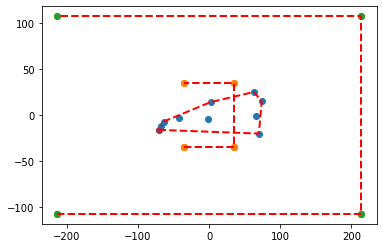

In [182]:
sql_str = "SELECT * from '02368519f422700ed97e630c460d83a5'"
df_exercisedata = pd.read_sql(sql_str, connection)
df_exercisedata['x'] = df_exercisedata.apply(lambda x: int(x['x']), axis=1)
x = df_exercisedata[['x']].values
df_exercisedata['y'] = df_exercisedata.apply(lambda x: int(x['y']), axis=1)
y = df_exercisedata[['y']].values
hull = ConvexHull(df_exercisedata[['x','y']])
hd = calcArea(hull.volume, in_hd=3)
hd

plt.scatter(x, y)
plt.plot(x[hull.vertices], y[hull.vertices], 'r--', lw=2)

plt.plot(x[hull.vertices[0]], y[hull.vertices[0]], 'ro', alpha=0.5)

m = 35
n = 35
x_min = np.array([-m, m, -m, m, -m, m, -m, m, -m, m])
y_min = np.array([-n, -n, n, n, -n, -n, n, n, -n, -n])
hull_min = ConvexHull(np.column_stack((x_min, y_min)))
print('Volume exercise: {0}'.format(hull.volume))
print('Volume min: {0}'.format(hull_min.volume))
plt.scatter(x_min, y_min)
plt.plot(x_min[hull_min.vertices], y_min[hull_min.vertices], 'r--', lw=2)
x_max = np.array([-214, 214, -214, 214, -214, 214, -214, 214, -214, 214])
y_max = np.array([-107, -107, 107, 107, -107, -107, 107, 107, -107, -107])
hull_max = ConvexHull(np.column_stack((x_max, y_max)))
print('Volume max: {0}'.format(hull_max.volume))
plt.scatter(x_max, y_max)
plt.plot(x_max[hull_max.vertices], y_max[hull_max.vertices], 'r--', lw=2)

In [77]:
hull.area

333.79799622311066

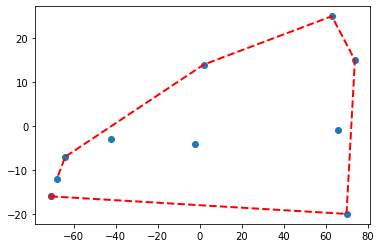

In [83]:
plt.scatter(x,y)
plt.plot(x[hull.vertices], y[hull.vertices], 'r--', lw=2)

plt.plot(x[hull.vertices[0]], y[hull.vertices[0]], 'ro', alpha=0.5)

plt.show()

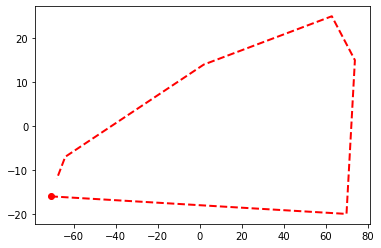

Volume min: 4900.0
Volume max: 91592.0


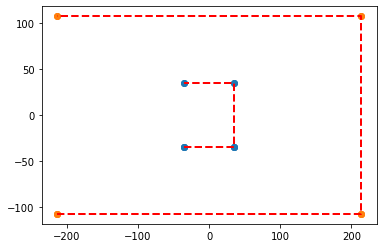

In [126]:
m = 35
n = 35
x_min = np.array([-m, m, -m, m, -m, m, -m, m, -m, m])
y_min = np.array([-n, -n, n, n, -n, -n, n, n, -n, -n])
hull_min = ConvexHull(np.column_stack((x, y)))
print('Volume min: {0}'.format(hull_min.volume))
plt.scatter(x_min,y_min)
plt.plot(x_min[hull_min.vertices], y_min[hull_min.vertices], 'r--', lw=2)
x_max = np.array([-214, 214, -214, 214, -214, 214, -214, 214, -214, 214])
y_max = np.array([-107, -107, 107, 107, -107, -107, 107, 107, -107, -107])
hull_max = ConvexHull(np.column_stack((x_max, y_max)))
print('Volume max: {0}'.format(hull_max.volume))
plt.scatter(x_max,y_max)
plt.plot(x_max[hull_min.vertices], y_max[hull_min.vertices], 'r--', lw=2)

In [131]:
hd_max = 3
hd = np.linspace(0, hd_max, 11)
area_range = np.linspace(hull_min.volume, hull_max.volume, 11)
# z = np.polyfit(hd, area_range, 1)



In [132]:
hd

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ])

In [113]:
hull_min.volume

91592.0

In [169]:
def calcArea(in_area, in_hd):
    m = 35
    n = 35
    x_min = np.array([-m, m, -m, m, -m, m, -m, m, -m, m])
    y_min = np.array([-n, -n, n, n, -n, -n, n, n, -n, -n])
    hull_min = ConvexHull(np.column_stack((x_min, y_min)))
    a = 214
    b = 107
    x_min = np.array([-a, a, -a, a, -a, a, -a, a, -a, a])
    y_min = np.array([-b, -b, b, b, -b, -b, b, b, -b, -b])
    hull_max = ConvexHull(np.column_stack((x_max, y_max)))

    hd_max = in_hd
    slices = 11
    hd_range = np.linspace(0, hd_max, slices)
    # hd_range = np.append(hd_range, 5)
    area_range = np.linspace(hull_min.volume, hull_max.volume, 10)
    print(hd_range)
    print(area_range)

    below_range = np.sum(in_area > area_range)
    print(np.sum(in_area > area_range))
    return(hd_range[below_range])
    